In [16]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree

In [17]:
# load our dataset
heloc= pandas.read_csv("Heloc labeled.csv") 

heloc.head(3)

,Age,Sex,Income,HELOC
0,30,Female,101000,0
1,25,Male,86000,0
2,20,Male,50000,0


In [36]:
# convert string type sex to number code
def sex_recode(sex):
    if sex =="Female":
        return 1
    elif sex == "Male":
        return 0
    else:
        return 2

heloc['Sex']=heloc['Sex'].apply(sex_recode)

heloc.head()

,Age,Sex,Income,HELOC
0,30,2,101000,0
1,25,2,86000,0
2,20,2,50000,0
3,26,2,58000,0
4,18,2,93000,0


In [37]:
# split attributes and labels
X = heloc[['Age', 'Sex', 'Income ']]
Y = heloc[['HELOC']]

In [38]:
# model with decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=2021)
clf = clf.fit(X, Y)

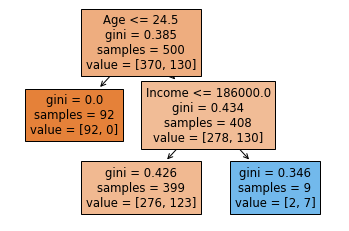

In [39]:
tree.plot_tree(clf, filled=True, feature_names = ['Age', 'Sex', 'Income']);

In [40]:
# test on classifying unlabeled data
heloc_unlbl = pandas.read_csv("Heloc unlabeled.csv") 

# convert sex col to num code
heloc_unlbl['Sex'] = heloc_unlbl['Sex'].apply(sex_recode)

heloc_unlbl.head()

,Age,Sex,Income
0,25,1,45000
1,23,0,22000
2,50,1,17000
3,28,1,38000
4,56,0,24000


In [42]:
# what's the predicted results?
Y_new = clf.predict(heloc_unlbl)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Income
Feature names seen at fit time, yet now missing:
- Income 

  warnings.warn(message, FutureWarning)


In [43]:
# make new df with the predicted results!
heloc_pred = heloc_unlbl

heloc_pred['Heloc'] = Y_new ## add in the new column of predictions

heloc_pred.head()

,Age,Sex,Income,Heloc
0,25,1,45000,0
1,23,0,22000,0
2,50,1,17000,0
3,28,1,38000,0
4,56,0,24000,0
